In [1]:
from matplotlib import pyplot as plt

import numpy as np
np.random.seed(42)
import random
random.seed(42)

# Question 11

In [2]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

Create TF-IDF matrix

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# count
vectorizer = CountVectorizer(min_df=3, stop_words='english')
X_counts = vectorizer.fit_transform(dataset.data)

# TF-IDF
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
print("Dimension of TF-IDF matrix is ",X_tfidf.shape)

('Dimension of TF-IDF matrix is ', (18846, 52295))


K-means directly on full-dimension data

In [5]:
from sklearn.cluster import KMeans
from sklearn import metrics

km = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30, init='k-means++')
km.fit(X_tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=20, n_init=30, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [6]:
labels = dataset.target
cm = metrics.cluster.contingency_matrix(labels, km.labels_)
print(cm)

[[ 57  40   0   1   5  84   0   0  83   1   0   0   2 401  36   9   0  80
    0   0]
 [ 82   0   1  16   1   1   2   0 241   0   0   4   1   3 525   0   0   0
    0  96]
 [ 33   0  18   2   0   0  11   0 126   0   2   2   0   0 206   0   0   0
    0 585]
 [ 25   0 230   7   1   0   5   0 175   0   0   5   0   0 437   0   3   0
    0  94]
 [ 25   0 103  10   0   0   1   0 372   0   0   3   0   1 437   0   0   0
    0  11]
 [ 86   0   1  25   0   0   2   0 143   3   0   4   0   1 569   0   0   0
    0 154]
 [  5   0  70   3  27   0   7   0 477   0   0  12   5   0 334   0  12   0
    0  23]
 [ 18   0   0   7 568   0   1   0 210   0   0   5   3   0 164  12   0   0
    0   2]
 [ 77   0   0  17 682   0   1   0 110   0   0  12   0   0  97   0   0   0
    0   0]
 [  2   0   0   2   0   0   1   0 312   0   0   2   4   1 171   0 499   0
    0   0]
 [  2   0   0   3   2   0   0   0 110   0   0  50   0   1  83   0 748   0
    0   0]
 [ 49   0   0   3   0   0  33   0  93 543   0   0  17   3 206  34

In [7]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("adjusted_mutual_info_score: %0.3f"
      % metrics.adjusted_mutual_info_score(labels, km.labels_))

Homogeneity: 0.359
Completeness: 0.451
V-measure: 0.400
Adjusted Rand-Index: 0.137
adjusted_mutual_info_score: 0.357


# Question 12

In [51]:
r_list = [2,5,10,20,50,100,200,300,500]

homo = np.zeros(9)
comp = np.zeros(9)
vmea = np.zeros(9)
ari = np.zeros(9)
ami = np.zeros(9)

Using truncated SVD

In [52]:
from sklearn.decomposition import TruncatedSVD

for i,r in enumerate(r_list):
    # compute X_reduced
    svd = TruncatedSVD(n_components=r, random_state=42)
    X_reduced = svd.fit_transform(X_tfidf)
    # do K-means on X_reduced
    km = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30, init='k-means++')
    km.fit(X_reduced)
    # evaluate using 5 measure scores
    homo[i] = metrics.homogeneity_score(labels, km.labels_)
    comp[i] = metrics.completeness_score(labels, km.labels_)
    vmea[i] = metrics.v_measure_score(labels, km.labels_)
    ari[i] = metrics.adjusted_rand_score(labels, km.labels_)
    ami[i] = metrics.adjusted_mutual_info_score(labels, km.labels_)       

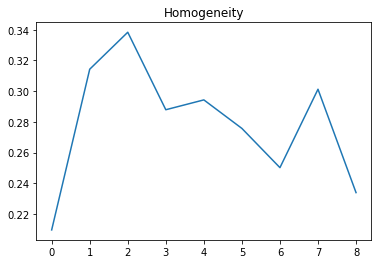

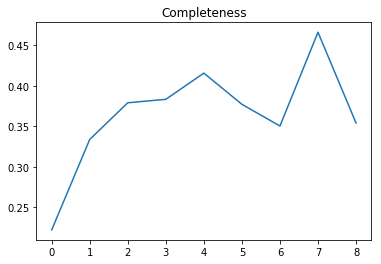

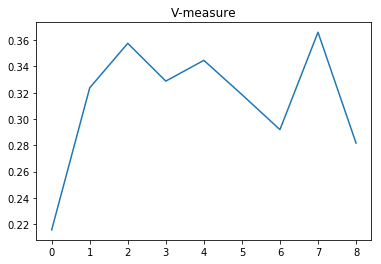

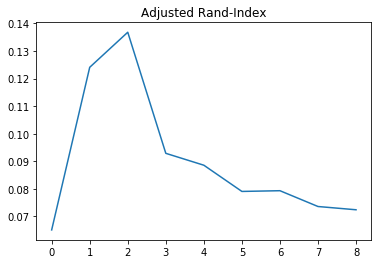

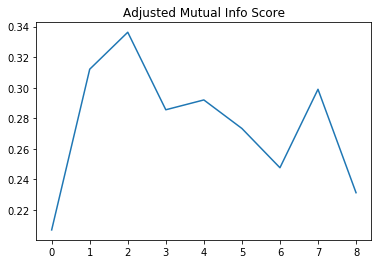

In [53]:
plt.figure();plt.plot(homo);plt.title("Homogeneity")
plt.figure();plt.plot(comp);plt.title("Completeness")
plt.figure();plt.plot(vmea);plt.title("V-measure")
plt.figure();plt.plot(ari);plt.title("Adjusted Rand-Index")
plt.figure();plt.plot(ami);plt.title("Adjusted Mutual Info Score")

plt.show()

Using NMF

In [ ]:
from sklearn.decomposition import NMF

for i,r in enumerate(r_list):
    # compute X_reduced
    nmf = NMF(n_components=r, init='random', random_state=42)
    X_reduced = nmf.fit_transform(X_tfidf)
    # do K-means on X_reduced
    km = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30, init='k-means++')
    km.fit(X_reduced)
    # evaluate using 5 measure scores
    homo[i] = metrics.homogeneity_score(labels, km.labels_)
    comp[i] = metrics.completeness_score(labels, km.labels_)
    vmea[i] = metrics.v_measure_score(labels, km.labels_)
    ari[i] = metrics.adjusted_rand_score(labels, km.labels_)
    ami[i] = metrics.adjusted_mutual_info_score(labels, km.labels_)  

In [ ]:
plt.figure();plt.plot(homo);plt.title("Homogeneity")
plt.figure();plt.plot(comp);plt.title("Completeness")
plt.figure();plt.plot(vmea);plt.title("V-measure")
plt.figure();plt.plot(ari);plt.title("Adjusted Rand-Index")
plt.figure();plt.plot(ami);plt.title("Adjusted Mutual Info Score")

plt.show()

In [54]:
r_list[2]

10

## Choose r=10 for later computation

In [30]:
def dim_reduce(svd_NMF,r_best,X):
    if svd_NMF==1:
        svd = TruncatedSVD(n_components=r_best, random_state=42)
        X_vis = svd.fit_transform(X)
        km_vis = KMeans(n_clusters=20, init='k-means++',n_init=30, max_iter=1000, random_state=0)
        km_vis.fit(X_vis) 
        title='(SVD)'
    else:
        model = NMF(n_components=r_best, init='random', random_state=42)
        X_vis = model.fit_transform(X)
        km_vis = KMeans(n_clusters=20, init='k-means++',n_init=30, max_iter=1000, random_state=0)
        km_vis.fit(X_vis)
        title='(NMF)'
    #reduced to 2d
    if r_best>2:
        svd_vis=TruncatedSVD(n_components=2, random_state=42)
        X_vis=svd_vis.fit_transform(X_vis)
    
    return X_vis,km_vis,title

In [31]:
def visualization(X_vis,km_vis,title):
    plt.figure()
    color=[]
    for i in range(X_vis.shape[0]):
        color.append([0.5*(1-km_vis.labels_[i]),0.5,0.5])
    plt.scatter(X_vis[:,0],X_vis[:,1],s=1,c=km_vis.labels_)
#     plt.scatter(X_vis[:,0],X_vis[:,1],s=1,color=color)
    title1='Clustering label'+title
    plt.xlabel(title1)
    plt.figure()   
    color=[]
    for i in range(X_vis.shape[0]):
        color.append([0.5*labels[i],0.5,0.5])
    plt.scatter(X_vis[:,0],X_vis[:,1],s=1,c=labels)
#     plt.scatter(X_vis[:,0],X_vis[:,1],s=1,color=color)
    title1='Ground truth class label'+title
    plt.xlabel(title1)
    plt.show()

Plot using truncated SVD

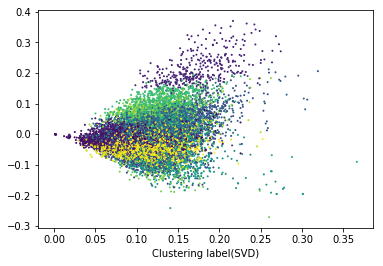

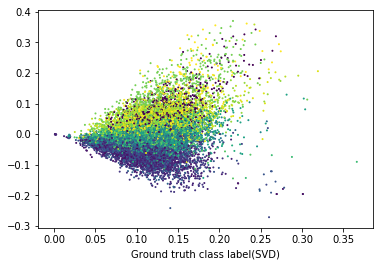

Homogeneity: 0.338
Completeness: 0.379
V-measure: 0.358
Adjusted Rand-Index: 0.137
adjusted_mutual_info_score: 0.336


In [32]:
r_best_svd = 10
X_reduced_svd, km_svd, title1 = dim_reduce(1,r_best_svd,X_tfidf)
visualization(X_reduced_svd, km_svd, title1)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km_svd.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km_svd.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km_svd.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km_svd.labels_))
print("adjusted_mutual_info_score: %0.3f"
      % metrics.adjusted_mutual_info_score(labels, km_svd.labels_))

Plot using NMF

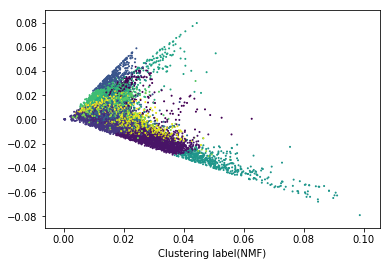

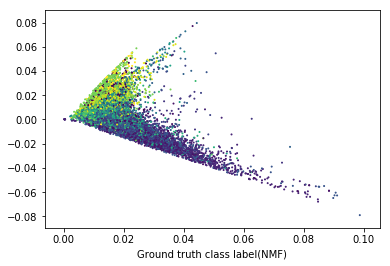

Homogeneity: 0.313
Completeness: 0.352
V-measure: 0.331
Adjusted Rand-Index: 0.124
adjusted_mutual_info_score: 0.311


In [33]:
r_best_nmf = 10
X_reduced_nmf, km_nmf, title2 = dim_reduce(0,r_best_nmf,X_tfidf)
visualization(X_reduced_nmf, km_nmf, title2)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km_nmf.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km_nmf.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km_nmf.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km_nmf.labels_))
print("adjusted_mutual_info_score: %0.3f"
      % metrics.adjusted_mutual_info_score(labels, km_nmf.labels_))

# Question 8-10

In [34]:
def zero_var(X):
    return X/X.std(axis=0)

def transform(X,c=0.01):
    return np.multiply(np.sign(X),(np.log(abs(X)+c)-np.log(c)))

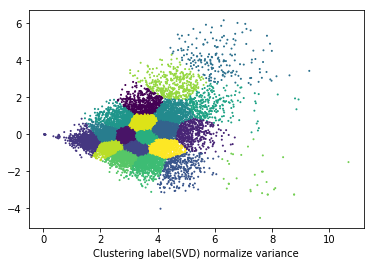

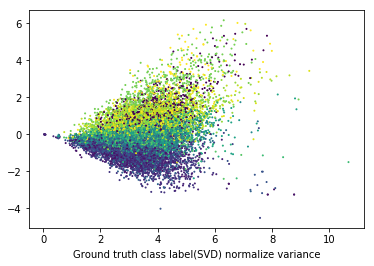

Homogeneity: 0.197
Completeness: 0.211
V-measure: 0.204
Adjusted Rand-Index: 0.061
adjusted_mutual_info_score: 0.194


In [35]:
# SVD normalize variance

X = zero_var(X_reduced_svd)
km = KMeans(n_clusters=20, init='k-means++',n_init=30, max_iter=1000, random_state=0)
km.fit(X) 
visualization(X,km,'(SVD) normalize variance')

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("adjusted_mutual_info_score: %0.3f"
      % metrics.adjusted_mutual_info_score(labels, km.labels_))

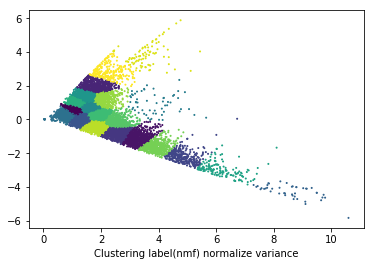

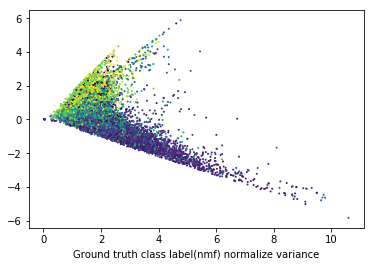

Homogeneity: 0.189
Completeness: 0.211
V-measure: 0.199
Adjusted Rand-Index: 0.061
adjusted_mutual_info_score: 0.186


In [36]:
# nmf normalize variance

X = zero_var(X_reduced_nmf)
km = KMeans(n_clusters=20, init='k-means++',n_init=30, max_iter=1000, random_state=0)
km.fit(X) 
visualization(X,km,'(nmf) normalize variance')

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("adjusted_mutual_info_score: %0.3f"
      % metrics.adjusted_mutual_info_score(labels, km.labels_))

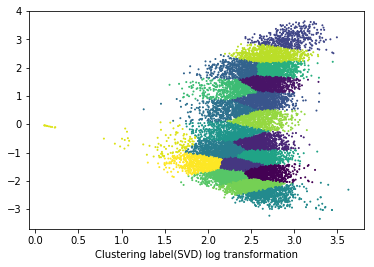

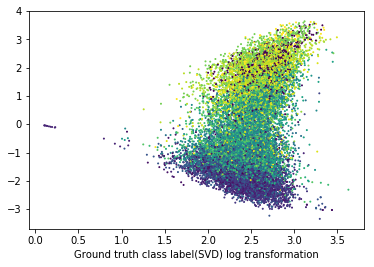

Homogeneity: 0.219
Completeness: 0.224
V-measure: 0.221
Adjusted Rand-Index: 0.073
adjusted_mutual_info_score: 0.216


In [37]:
# SVD log transformation

X = transform(X_reduced_svd)
km = KMeans(n_clusters=20, init='k-means++',n_init=30, max_iter=1000, random_state=0)
km.fit(X) 
visualization(X,km,'(SVD) log transformation')

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("adjusted_mutual_info_score: %0.3f"
      % metrics.adjusted_mutual_info_score(labels, km.labels_))

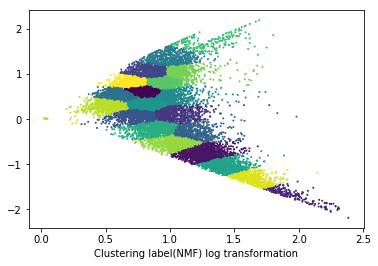

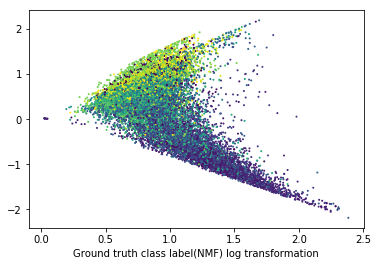

Homogeneity: 0.200
Completeness: 0.207
V-measure: 0.203
Adjusted Rand-Index: 0.066
adjusted_mutual_info_score: 0.197


In [38]:
# NMF log transformation

X = transform(X_reduced_nmf)
km = KMeans(n_clusters=20, init='k-means++',n_init=30, max_iter=1000, random_state=0)
km.fit(X) 
visualization(X,km,'(NMF) log transformation')

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("adjusted_mutual_info_score: %0.3f"
      % metrics.adjusted_mutual_info_score(labels, km.labels_))

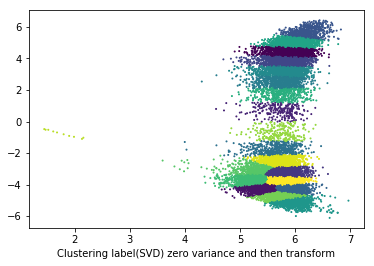

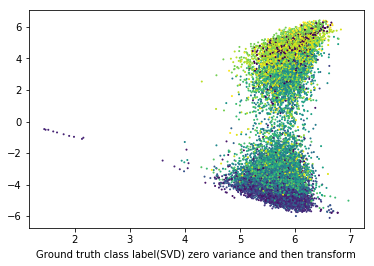

Homogeneity: 0.210
Completeness: 0.222
V-measure: 0.216
Adjusted Rand-Index: 0.078
adjusted_mutual_info_score: 0.208


In [39]:
# SVD zero variance and then transform

X = transform(zero_var(X_reduced_svd))
km = KMeans(n_clusters=20, init='k-means++',n_init=30, max_iter=1000, random_state=0)
km.fit(X) 
visualization(X,km,'(SVD) zero variance and then transform')

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("adjusted_mutual_info_score: %0.3f"
      % metrics.adjusted_mutual_info_score(labels, km.labels_))

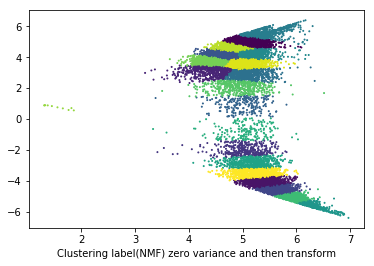

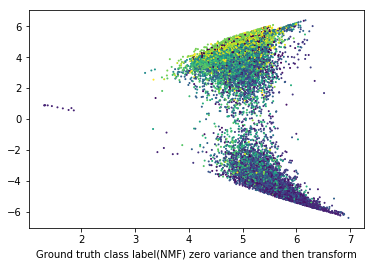

Homogeneity: 0.188
Completeness: 0.205
V-measure: 0.196
Adjusted Rand-Index: 0.065
adjusted_mutual_info_score: 0.185


In [40]:
# NMF zero variance and then transform

X = transform(zero_var(X_reduced_nmf))
km = KMeans(n_clusters=20, init='k-means++',n_init=30, max_iter=1000, random_state=0)
km.fit(X) 
visualization(X,km,'(NMF) zero variance and then transform')

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("adjusted_mutual_info_score: %0.3f"
      % metrics.adjusted_mutual_info_score(labels, km.labels_))

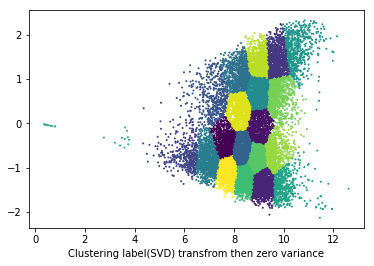

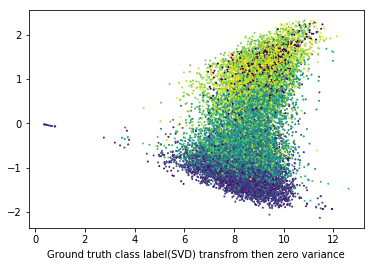

Homogeneity: 0.192
Completeness: 0.200
V-measure: 0.196
Adjusted Rand-Index: 0.065
adjusted_mutual_info_score: 0.190


In [41]:
# SVD transfrom then zero variance

X = zero_var(transform(X_reduced_svd))
km = KMeans(n_clusters=20, init='k-means++',n_init=30, max_iter=1000, random_state=0)
km.fit(X) 
visualization(X,km,'(SVD) transfrom then zero variance')

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("adjusted_mutual_info_score: %0.3f"
      % metrics.adjusted_mutual_info_score(labels, km.labels_))

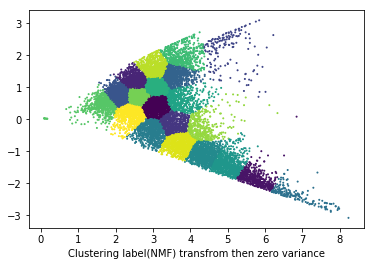

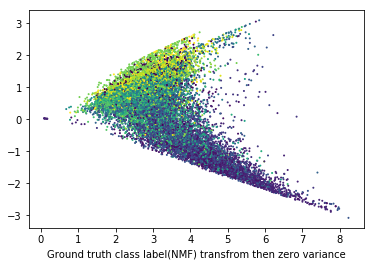

Homogeneity: 0.190
Completeness: 0.200
V-measure: 0.195
Adjusted Rand-Index: 0.062
adjusted_mutual_info_score: 0.188


In [42]:
# NMF transfrom then zero variance

X = zero_var(transform(X_reduced_nmf))
km = KMeans(n_clusters=20, init='k-means++',n_init=30, max_iter=1000, random_state=0)
km.fit(X) 
visualization(X,km,'(NMF) transfrom then zero variance')

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("adjusted_mutual_info_score: %0.3f"
      % metrics.adjusted_mutual_info_score(labels, km.labels_))